In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [5]:
dataset.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


In [6]:
# dataset = dataset.drop("User ID", axis=1)
dataset = dataset.drop("User ID", axis=1) # axis=1 means drop column, axis=0 means drop row

In [7]:
dataset.head(3)

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False


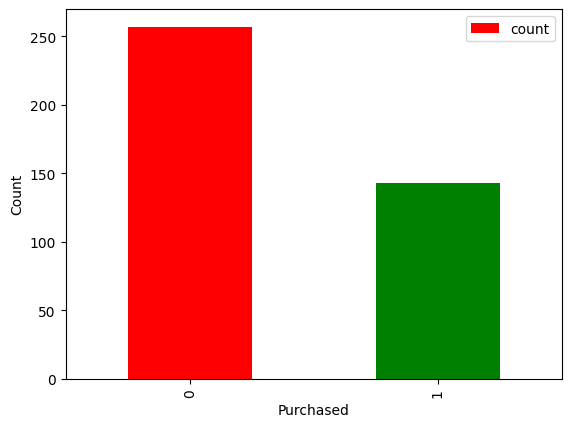

In [14]:
# dataset["Purchased"].value_counts()
dataset["Purchased"].value_counts().plot(kind="bar", color=["red", "green"]).plot(label="Purchased", title="Purchased Distribution")
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.legend()
plt.show()

In [15]:
indep=dataset[["Age","EstimatedSalary","Gender_Male"]]
dep=dataset["Purchased"]

In [16]:
indep.shape

(400, 3)

In [17]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=0)
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=0)

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", splitter="random", max_features="sqrt", random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt', random_state=0,
                       splitter='random')

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)

In [21]:
print(cm)

[[71  8]
 [ 9 32]]


In [22]:
clf = classification_report(y_test, y_pred, target_names=["Not Purchased", "Purchased"])
print(clf)

               precision    recall  f1-score   support

Not Purchased       0.89      0.90      0.89        79
    Purchased       0.80      0.78      0.79        41

     accuracy                           0.86       120
    macro avg       0.84      0.84      0.84       120
 weighted avg       0.86      0.86      0.86       120



In [24]:
# ================ Decsion Tree ==========================
print("What is the overall performance of the model?")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

What is the overall performance of the model?
Accuracy: 85.83%


In [25]:
print("What is the correct classification of not purchased?")
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print(f"Recall: {recall * 100:.2f}%")

What is the correct classification of not purchased?
Recall: 89.87%


In [26]:
print("What is the correct classification of purchased?")
recall = cm[1][1] / (cm[1][0] + cm[1][1])
print(f"Recall: {recall * 100:.2f}%")


What is the correct classification of purchased?
Recall: 78.05%


In [27]:
# f1_score = 2 * (recall * accuracy) / (recall + accuracy)
print("What is the f1 score?")
f1_score = 2 * (recall * accuracy) / (recall + accuracy)
print(f"F1 Score: {f1_score * 100:.2f}%")

What is the f1 score?
F1 Score: 81.76%


In [28]:
# support = cm[1][0] + cm[1][1]
print("What is the support?")
support = cm[1][0] + cm[1][1]
print(f"Support: {support}")

What is the support?
Support: 41
